


Project Level 2 : Predicting House Prices with Linear Regression




In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
housing = pd.DataFrame(pd.read_csv("Desktop/Obasis project1/Project 1 Level2/Housing (1).csv"))

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [43]:
housing.shape

(545, 13)

In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#housing['Class'].value_counts()

In [20]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [25]:
numerical_features = housing.select_dtypes(include=['int64', 'float64']).drop(columns=['price'])
target_variable = housing['price']

In [27]:
numerical_features.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [29]:
target_variable.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [61]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [31]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


 Distribution of The target Variable( Housing Price)

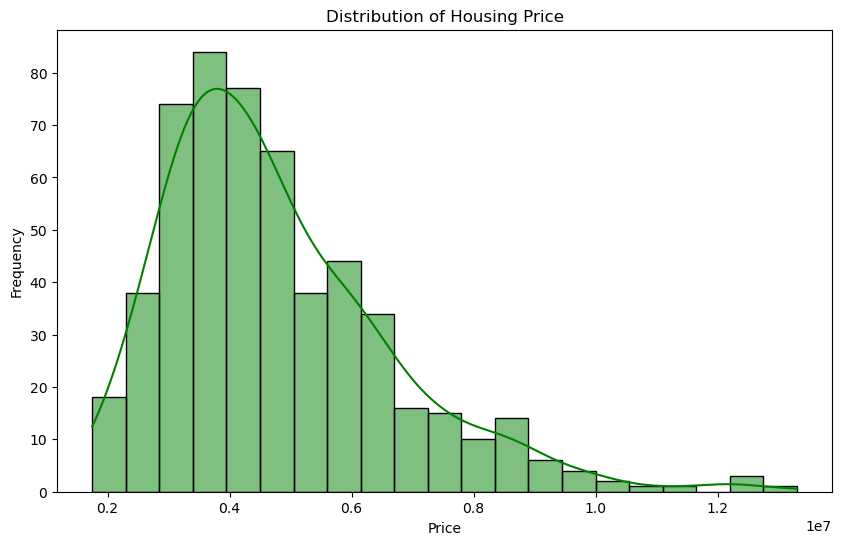

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(housing['price'], kde=True, color='green')
plt.title('Distribution of Housing Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

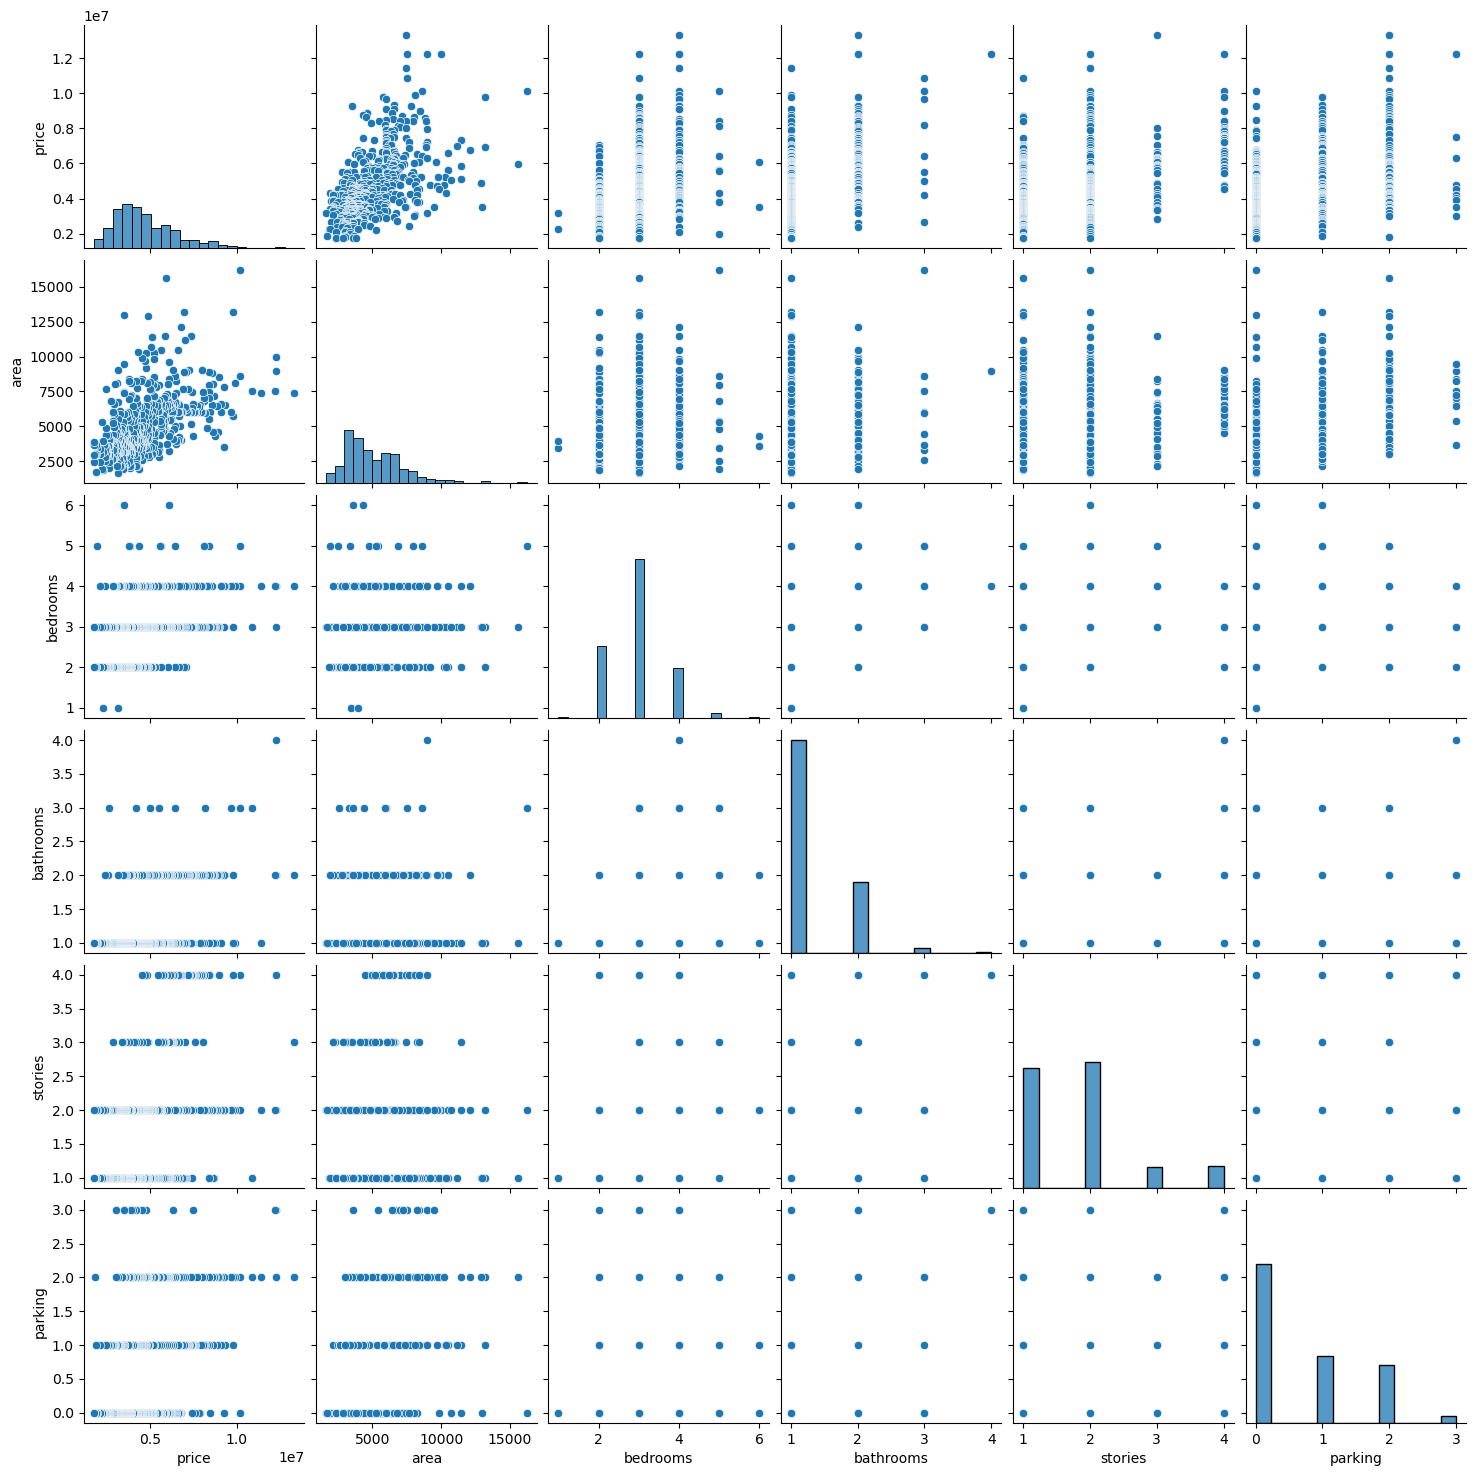

In [48]:
sns.pairplot(housing)
plt.show()

Encode Categorical Variables to numeric forms

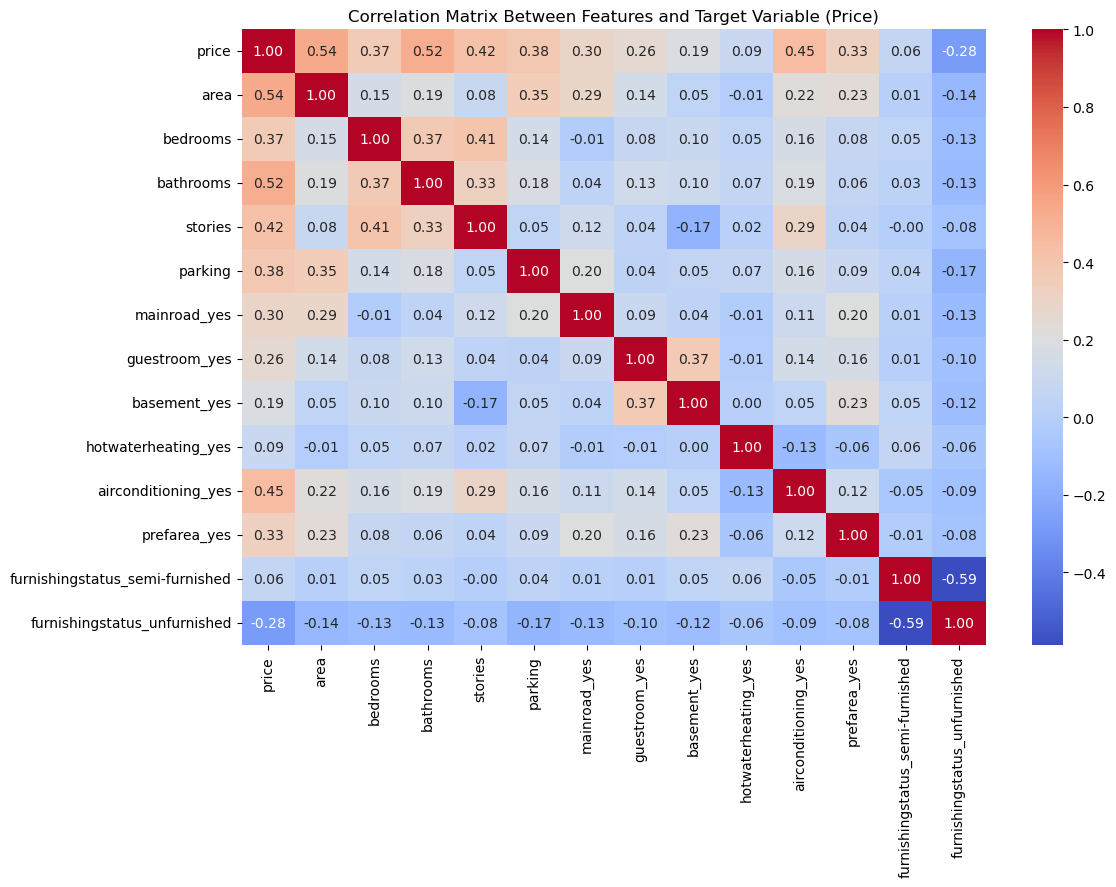

In [63]:
# Encode categorical variables
housing_encoded = pd.get_dummies(housing, drop_first=True)

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(housing_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Features and Target Variable (Price)')
plt.show()


Feature Selection

In [66]:
housing_encoded = pd.get_dummies(housing, drop_first=True)

In [68]:
# Define the features (X) and target (y)
X = housing_encoded.drop(columns=['price'])
y = housing_encoded['price']

 Model Training

Split the data set into training  and testing set

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Linear Regressions Models

In [83]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [86]:
y_pred = lr.predict(X_test)

In [88]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
"\nModel Performance:"
f"Mean Squared Error (MSE): {mse:.2f}"
f"R-squared (R²): {r2:.2f}"

'R-squared (R²): 0.65'


 Visualization

In [93]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

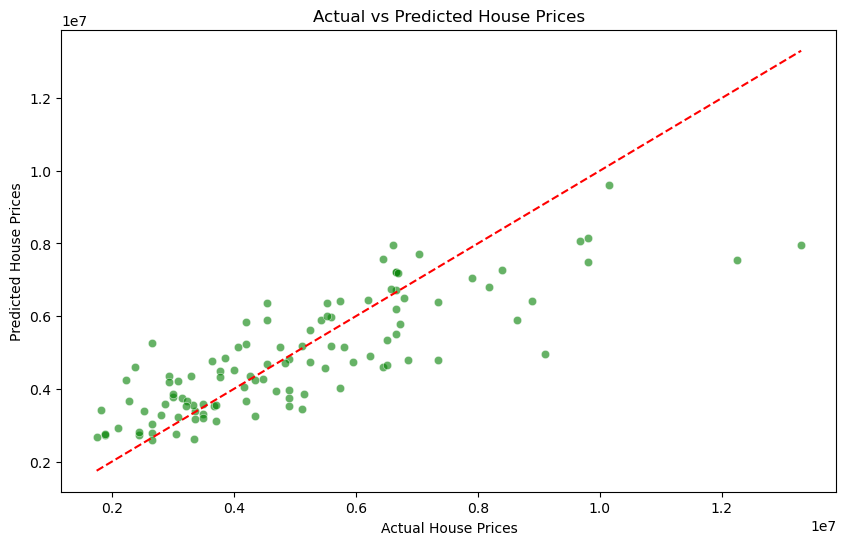

In [115]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison, color='green', alpha=0.6)
plt.plot([comparison['Actual'].min(), comparison['Actual'].max()], 
         [comparison['Actual'].min(), comparison['Actual'].max()], 
         color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()